#### Importing of all needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import IPython.display as ipy

#### Realisation of Derivative Class

In [39]:
class DerivativeNum:
    
    def __init__(self, function, h, alpha, dots):
        self._function = function
        self._h = h
        self._alpha = alpha
        self._dots = dots
        return self.Check()
    
    def SetAlpha(self, alpha):
        self._alpha = alpha
        return self.Check()
        
    def SetDots(self, dots):
        self._dots = dots
        return self.Check()
        
    def Check(self):
        if len(self._alpha) != len(self._dots):
            raise NotImplementedError('Incorrect array size of coefficients, check it!')
    
    def __call__(self, x):
        f, h, alpha, dots = self._function, self._h, self._alpha, self._dots
        der = 0
        for numbers in range(len(alpha)):
            der = der + alpha[numbers]*f(x+h*dots[numbers])/h
        return 1/h*np.dot(self._alpha, self._function(x+self._h*self._dots))

#### Definition of formulas (2) - (6) for numerical differentiation

In [3]:
alpha2 = np.array([1., -1.])
dots2 = np.array([1., 0.])
alpha3 = np.array([1., -1.])
dots3 = np.array([0., -1.])
alpha4 = np.array([0.5, -0.5])
dots4 = np.array([1., -1.])
alpha5 = np.array([4/6, -4/6, -1/12, 1/12])
dots5 = np.array([1., -1., 2., -2.])
alpha6 = np.array([+0.75, -0.75, -0.15, +0.15, +1/60, -1/60])
dots6 = np.array([1., -1., 2., -2., 3., -3.])
alpha = [_,_,alpha2, alpha3, alpha4, alpha5, alpha6]
dots = [_,_,dots2, dots3, dots4, dots5, dots6]
# _ is tip for iteration, see below

#### Definition of exploring functions

In [4]:
Func1 = lambda x: np.sin(x**2.)
Func2 = lambda x: np.cos(np.sin(x))
Func3 = lambda x: np.exp(np.sin(np.cos(x)))
Func4 = lambda x: np.log(x+3.)
Func5 = lambda x: np.sqrt(x+3.)
Func = [Func1, Func2, Func3, Func4, Func5]

#### Symbol functions

In [5]:
xSym = smp.Symbol('x')
functionsSym = [smp.sin(xSym**2),
                smp.cos(smp.sin(xSym)),
                smp.exp(smp.sin(smp.cos(xSym))),
                smp.log(xSym+3),smp.sqrt(xSym+3)
               ] 
derivativesAnalyticalSym = [smp.diff(f, xSym) for f in functionsSym]
derivativesAnalytical = [smp.lambdify(xSym, f) \
                        for f in derivativesAnalyticalSym]

#### Group by function

sin(x**2)

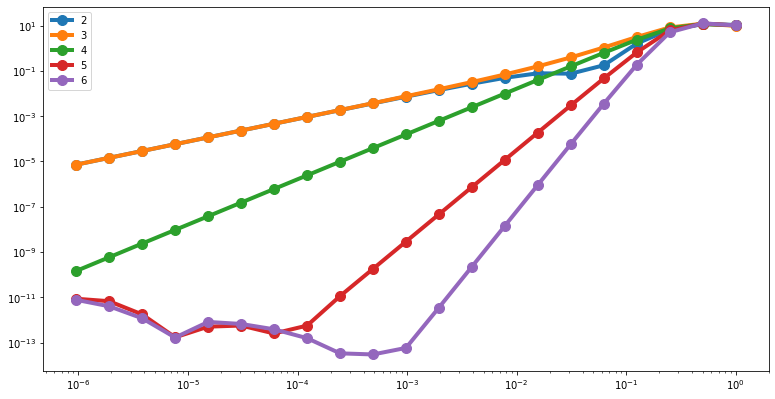

In [6]:
steps = [2**(-n) for n in range(21)]
x0 = 5.
figureSizeConst = (13, 6.7)
for z in range(len(Func)):
    plt.figure(figsize=figureSizeConst)
    ipy.display(functionsSym[z])
    for i in range(2,7):
        errors = []
        for h in steps:
            error = abs(DerivativeNum(Func[z], h, alpha[i], dots[i])(x0) - derivativesAnalytical[z](x0))
            errors.append(error)
            
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10, label=i)
    plt.legend(loc='best')
    plt.show()

#### Group by numerical method

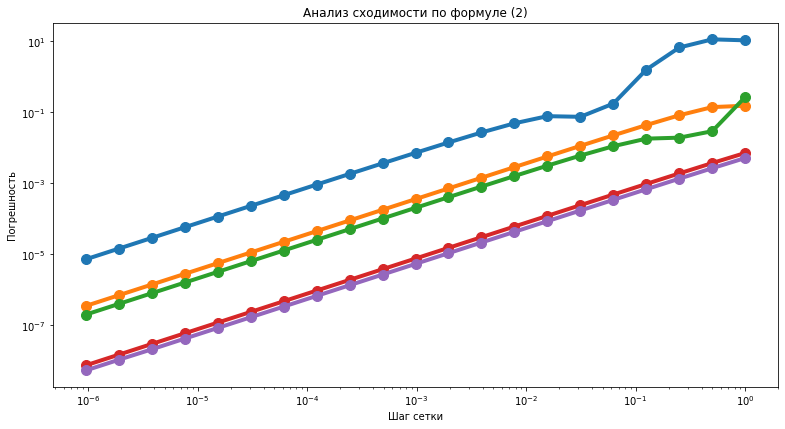

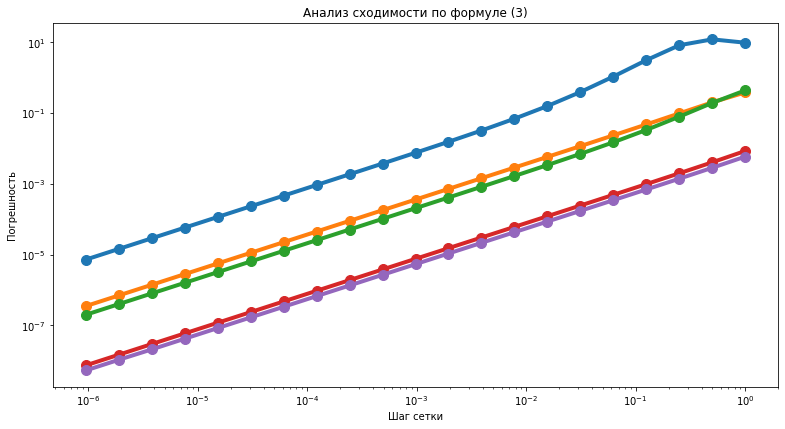

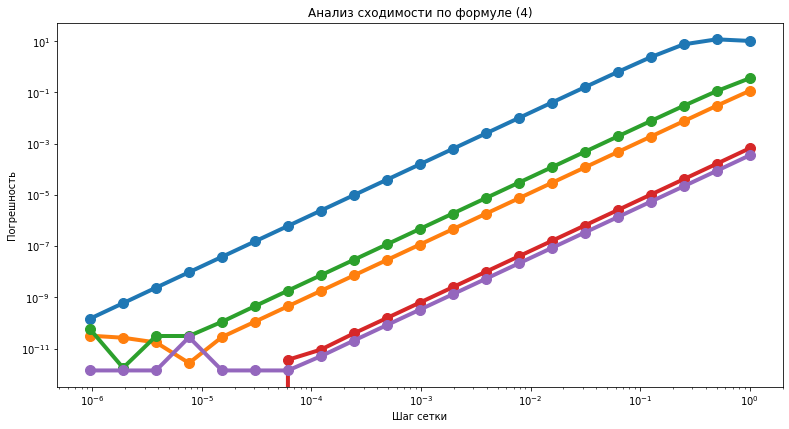

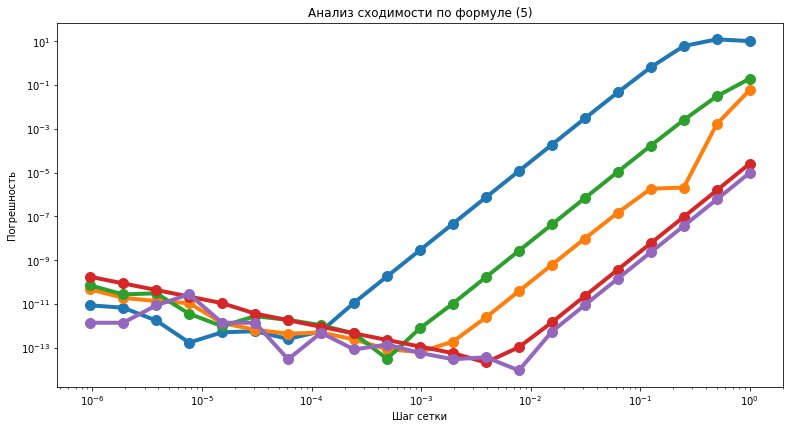

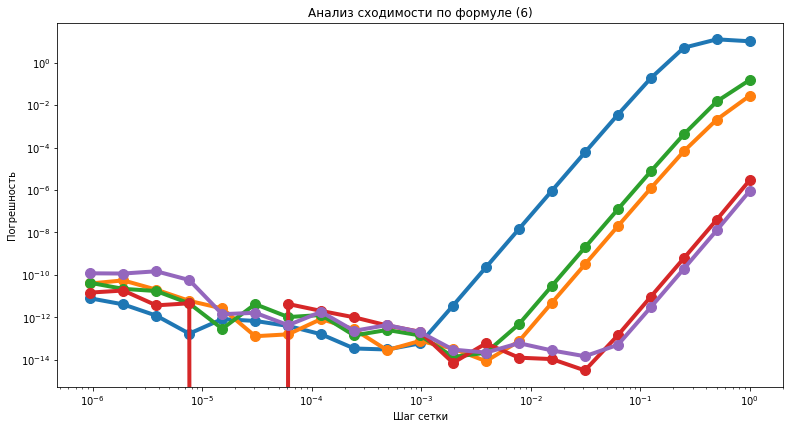

In [7]:
steps = [2**(-n) for n in range(21)]
x0 = 5.
figureSizeConst = (13, 6.7)
DerivativeNumAll = [_,_,_,_,_,_,_]
for i in range(2,7):
    plt.figure(figsize=figureSizeConst)
    plt.title(("Анализ сходимости по формуле (") + str(i) +(")"))
    for f, derivativeAnalytical in zip(Func, derivativesAnalytical):
        errors = []
        for h in steps:
            DerivativeNumAll[i] = DerivativeNum(f, h, alpha[i], dots[i])
            error = abs(DerivativeNumAll[i](x0) - derivativeAnalytical(x0))
            errors.append(error)   
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
    plt.xlabel('Шаг сетки')
    plt.ylabel('Погрешность')
    plt.show()

In [8]:
f = Func[0]

In [40]:
class DerivativeNum2(DerivativeNum):
    def __init__(self, function=None, h=None):
        super().__init__(function, h, np.array([1., -1.]), np.array([1., 0.]))

In [41]:
class DerivativeNum3(DerivativeNum):
    def __init__(self, function=None, h=None):
        super().__init__(function, h, np.array([1., -1.]), np.array([0., -1.]))

In [42]:
h=2e-3
Z = DerivativeNum2(Func[0], h)
Z2 =DerivativeNum(Func[0], h, alpha[2], dots[2])

In [43]:
Z(5)-Z2(5)

0.0